<a href="https://colab.research.google.com/github/laduqueo/Senales_y_Sistemas/blob/main/parcial_1_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREGUNTAS

1. Se tiene un microprocesador de 5 bits con entrada análoga de $-3.3$ a $5$ [V]. Diseñe el sistema de acondicionamiento y digitalización para la señal:

$$x(t) = 20\sin\left(7t - \frac{\pi}{2}\right) - 3\cos(5t) + 2\cos(10t)$$

Presente las simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python, incluyendo al menos dos períodos de la señal estudiada.

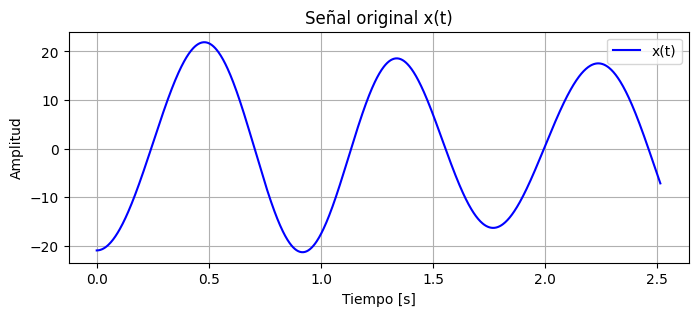

In [ ]:
import numpy as np #se importa la biblioteca para cálculos numéricos
import matplotlib.pyplot as plt #biblioteca para generar gráficos

T= (2*np.pi)/5 #periodo de la señal
t = np.linspace(0, 2*T, 1000) #en un rango de 0 a 2*T (deben ser al menos 2 periodos) se genera un array de 1000 puntos

# Señal original dada en el ejercicio
x = 20 * np.sin(7 * t - np.pi / 2) - 3 * np.cos(5 * t) + 2 * np.cos(10 * t)

# Graficamos la señal original
plt.figure(figsize=(8, 3)) #la figura aumentará su tamaño (largo*alto), en este caso 8 pulgas de largo por 3 de alto
plt.plot(t, x, label='x(t)', color='blue') #grafica la señal de x en funcion del tiempo t, el x(t) es la etiqueta para la leyenda y ¨color¨ asigna el color azul a la linea
plt.title('Señal original x(t)') #título de la gráfica
plt.xlabel('Tiempo [s]') #etiqueta para el eje x
plt.ylabel('Amplitud') #etiqueta para el eje y
plt.grid(True) #activa la cuadricula de la gráfica
plt.legend() #muestra la leyenda
plt.show() #muestra la figura en la pantalla

Se grafica la señal continua original $x(t)$. Esta señal contiene tres componentes:

- Una senoidal de alta amplitud: $20\sin(7t - \frac{\pi}{2})$

- Un coseno de menor amplitud: $-3\cos(5t)$

- Un coseno de frecuencia doble y menor amplitud: $2\cos(10t)$

Su comportamiento es **periódico** con frecuencia fundamental de $5$ rad/s, por lo que su período es:  
$$T = \frac{2\pi}{5} \approx 1.26 \, \text{s}$$

Se representa en el intervalo de dos períodos para observar completamente sus variaciones.

---
Antes del acondicionamiento lineal, debemos adaptar la señal al rango de entrada del ADC:  $[-3.3, \, 5] \, \text{V}$

Para ello, se aplica una transformación lineal de la forma:  
$$y(t) = m \cdot x(t) + b$$

Donde:

$$
m = \frac{y_{\text{max}} - y_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

$$
b = y_{\text{min}} - m \cdot x_{\text{min}}
$$

Esto asegura que el mínimo y máximo de $x(t)$ se mapearán exactamente a $-3.3$ V y $5$ V respectivamente.


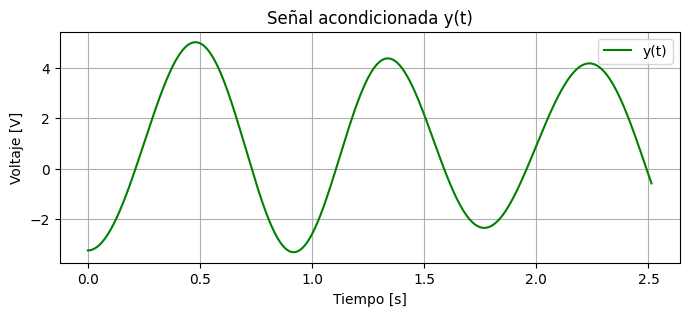

In [ ]:
# Acondicionamiento de acuerdo a la transformación lineal realizada
ymax = 5 #valor maximo del voltaje pedido
ymin = -3.3 #valor mínimo del voltaje pedido
xmax = np.max(x) #valor maximo de amplitud de la señal original
xmin = np.min(x) #valor minimo de amplitud de la señal original
m = (ymax - ymin) / (xmax - xmin) #formula de la pendiente
b = ymin - m * xmin #formula de b
y = m * x + b #ecuación acondicionada

# Graficamos la señal acondicionada
plt.figure(figsize=(8, 3)) #la figura aumentará su tamaño (largo*alto), en este caso 8 pulgas de largo por 3 de alto
plt.plot(t, y, label='y(t)', color='green') #grafica la señal de y en función del tiempo t, el y(t) es la etiqueta para la leyenda y ¨color¨ asigna el color verde a la linea
plt.title('Señal acondicionada y(t)') #titulo de la gráfica
plt.xlabel('Tiempo [s]') #etiqueta para el eje x
plt.ylabel('Voltaje [V]') #etiqueta para el eje y
plt.grid(True) #activa la cuadricula de la gráfica
plt.legend() #muestra la leyenda
plt.show() #muestra la figura en la pantalla

Una vez acondicionada, la señal $y(t)$ se encuentra dentro del rango de entrada del ADC.

Como el ADC es de **5 bits**, se tienen:

$$2^5 = 32 \text{ niveles de cuantización}$$

Cada nivel cubre un intervalo de:

$$
\Delta = \frac{5 - (-3.3)}{32} = \frac{8.3}{32} \approx 0.26 \, \text{V}
$$

Luego se realiza la cuantización uniforme redondeando cada valor de $y(t)$ al nivel más cercano.


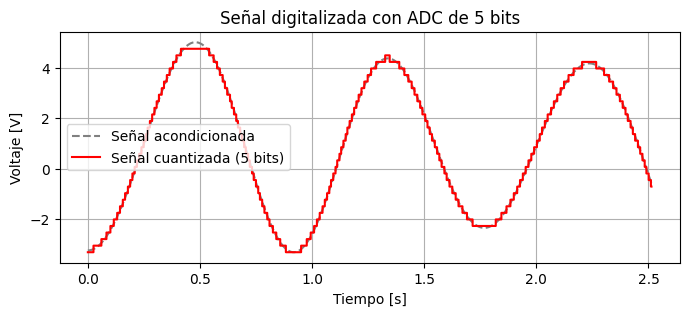

In [ ]:
# Digitalización (ADC de 5 bits)
niveles = 2**5 #niveles de cuantizacion para representar los 5 bits
delta = (ymax - ymin) / niveles #calcula la cuantizacion, lo que indica el tamaño de cada intervalo

# Cuantización
y_cuant = np.round((y - ymin) / delta) #para cada valor de y(t), se calcula al nivel al que corresponde
y_cuant = np.clip(y_cuant, 0, niveles - 1) #asegura que los niveles esten dentro del rango permitido, desde el 0 al 31 dado que son 32 niveles
y_digital = y_cuant * delta + ymin  #convierte los numeros enteros (niveles) a voltajes

# Graficar señal digitalizada
plt.figure(figsize=(8, 3)) #la figura aumentará su tamaño (largo*alto), en este caso 8 pulgas de largo por 3 de alto
plt.plot(t, y, label='Señal acondicionada', linestyle='--', color='gray') #grafica la señal de y en función del tiempo t, el label es la etiqueta para la leyenda, linestyle permite ver una linea punteada y ¨color¨ asigna el color gris a la linea punteada
plt.step(t, y_digital, label='Señal cuantizada (5 bits)', color='red') #se dibuja una línea por escalones de la señal reconstruida, esta será de color rojo
plt.title('Señal digitalizada con ADC de 5 bits') #titulo de la grafica
plt.xlabel('Tiempo [s]') #etiqueta para el eje x
plt.ylabel('Voltaje [V]') #etiqueta para el eje y
plt.grid(True) #activa la cuadricula de la gráfica
plt.legend() #muestra la leyenda
plt.show() #muestra la figura en la pantalla

2. ¿Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo-digital con frecuencia de muestreo de 5~kHz, aplicado a la señal

$$x(t) = 3 \cos(1000\pi t) + 5 \sin(2000\pi t) + 10 \cos(11000\pi t)?$$
Realizar la simulación del proceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


La señal está compuesta por tres componentes:

- $3\cos(1000\pi t)$ → frecuencia de **500 Hz**
- $5\sin(2000\pi t)$ → frecuencia de **1000 Hz**
- $10\cos(11000\pi t)$ → frecuencia de **5500 Hz**

La frecuencia máxima es:  
$$f_{\text{max}} = 5500 \, \text{Hz}$$

Según el teorema de muestreo de **Nyquist**, para evitar aliasing se necesita una frecuencia de muestreo:

$$
f_s > 2 \cdot f_{\text{max}} = 2 \cdot 5500 = 11000 \, \text{Hz}
$$

Sin embargo, en la primera parte del ejercicio se usa un ADC con:

$$
f_s = 5 \, \text{kHz}
$$

Esto claramente **no cumple con el criterio de Nyquist**, por lo que se producirá **aliasing** en la señal digitalizada.

Se simula la discretización de $x(t)$ con una frecuencia de muestreo de **5 kHz**.  
El intervalo de muestreo es:

$$
T_s = \frac{1}{f_s} = \frac{1}{5000} = 0.0002 \, \text{s}
$$

Dado que:

$$
f_{\text{max}} = 5500 \, \text{Hz} > \frac{f_s}{2} = 2500 \, \text{Hz}
$$

La señal **sufre aliasing**, es decir, las componentes de alta frecuencia se reflejan en el espectro en posiciones incorrectas, **distorsionando la señal**.

Se propone un nuevo diseño para el conversor análogo-digital con una frecuencia de muestreo de **12 kHz**, superior a:

$$
2 \cdot f_{\text{max}} = 11 \, \text{kHz}
$$

Esto **cumple el criterio de Nyquist**, evitando el **aliasing**.

El nuevo intervalo de muestreo es:

$$T_s = \frac{1}{f_s} = \frac{1}{12000}$$


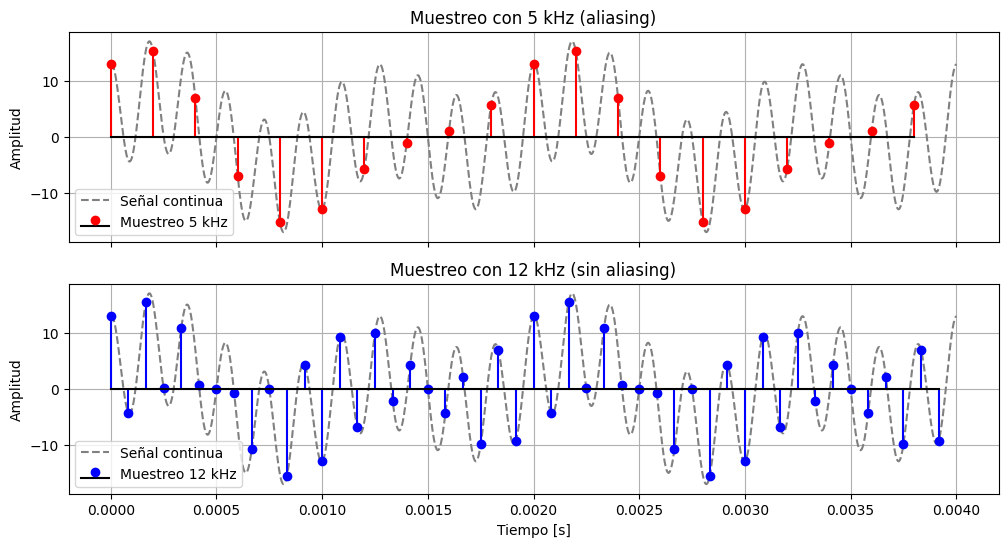

In [ ]:
import numpy as np #se importa la biblioteca para cálculos numéricos
import matplotlib.pyplot as plt #biblioteca para generar gráficos

wmin = 1000 * np.pi  # frecuencia angular mínima
T = 2 * np.pi / wmin  # período fundamental

t = np.linspace(0, 2*T, 1000) #en un rango de 0 a 2*T (deben ser al menos 2 periodos) se genera un array de 1000 puntos
xcont = 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(2000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t) #en la señal original se evalua t_cont (cada valor de tiempo)

# fs = 5 kHz
fs1 = 5000  # frecuencia de muestreo en Hz
Ts1 = 1 / fs1 #periodo de acuerdo a la frecuencia de muestreo

# instantes de muestreo
tdisc1 = np.arange(0, 2*T, Ts1) #Genera el vector de tiempo discreto tdisc1, que contiene los instantes en los que se va a muestrear la señal continua.

xdisc1 = 3 * np.cos(1000 * np.pi * tdisc1) + 5 * np.sin(2000 * np.pi * tdisc1) +  10 * np.cos(11000 * np.pi * tdisc1) #Evalúa la señal original (𝑡) x(t) en los puntos del vector t_disc1, para obtener la señal muestreada.

#Caso 2: Muestreo con fs = 12 kHz (sin aliasing)
fs2 = 12000                      # Frecuencia de muestreo alta (12 kHz), superior al doble de la máxima frecuencia de la señal
Ts2 = 1 / fs2                   # Período de muestreo correspondiente a fs2 (intervalo entre muestras)
tdisc2 = np.arange(0, 2*T, Ts2)  # Vector de tiempos discretos para tomar muestras, cubriendo 2 períodos
xdisc2 = 3 * np.cos(1000 * np.pi * tdisc2) + 5 * np.sin(2000 * np.pi * tdisc2) + 10 * np.cos(11000 * np.pi * tdisc2)
# Evalúa la señal x(t) en los tiempos discretos t_disc2 (con muestreo de 12 kHz)

#  Gráficas
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True)  # Crea una figura con 2 subgráficas (una encima de la otra), compartiendo el eje x

#Gráfica 1: fs = 5 kHz
axs[0].plot(t, xcont, label='Señal continua', color='gray', linestyle='--')
# Traza la señal continua como referencia (línea gris punteada)

axs[0].stem(tdisc1, xdisc1, linefmt='r-', markerfmt='ro', basefmt='k', label='Muestreo 5 kHz') # Dibuja la señal muestreada con 5 kHz como líneas verticales rojas

axs[0].set_title('Muestreo con 5 kHz (aliasing)')   # Título de la subgráfica superior
axs[0].set_ylabel('Amplitud')                       # Etiqueta eje y
axs[0].legend()                                     # Muestra leyenda
axs[0].grid(True)                                   # Activa la grilla

#  Gráfica 2: fs = 12 kHz
axs[1].plot(t, xcont, label='Señal continua', color='gray', linestyle='--')  # Traza la misma señal continua como referencia

axs[1].stem(tdisc2, xdisc2, linefmt='b-', markerfmt='bo', basefmt='k', label='Muestreo 12 kHz') # Dibuja la señal muestreada con 12 kHz como líneas azules

axs[1].set_title('Muestreo con 12 kHz (sin aliasing)')  # Título de la subgráfica inferior
axs[1].set_xlabel('Tiempo [s]')   # Etiqueta eje x
axs[1].set_ylabel('Amplitud')     # Etiqueta eje y
axs[1].legend()                   # Muestra leyenda
axs[1].grid(True)                 # Activa la grilla
plt.show()                        # Muestra la figura


3. La distancia media entre dos señales $x_1(t), x_2(t) \in \mathbb{R}, \mathbb{C}$, se puede expresar a partir de la potencia media:

$$
d(x_1, x_2) = \overline{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_0^T |x_1(t) - x_2(t)|^2 \, dt.
$$

Sean $x_1(t)$ y $x_2(t)$:

$x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = \frac{2\pi}{T},  T, A \in \mathbb{R}^+$

$x_1(t) = A \cos(\omega_0 t), \quad \omega_0 = 2\pi$

$$
x_2(t) =
\begin{cases}
1 & \text{si } 0 \leq t < \frac{T}{4} \\
-1 & \text{si } \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \text{si } \frac{3T}{4} \leq t < T
\end{cases}
$$

¿Cuál es la distancia media entre las señales?. Corrobore sus
 desarrollos con Sympy.


Se calcula la expresión:

$$(x_1(t) - x_2(t))^2$$

Esta diferencia se eleva al cuadrado porque estamos evaluando la **energía del error**, como en el cálculo de potencia.

El resultado es una **función a trozos**, distinta en cada subintervalo del período.

La **distancia media** se obtiene integrando:

$$|x_1(t) - x_2(t)|^2 $$

1. Primer tramo: $$ \int_0^{T/4} (x_1(t) - 1)^2 \, dt$$

2. Segundo tramo: $$\int_{T/4}^{3T/4} (x_1(t) + 1)^2 \, dt$$

3. Tercer tramo: $$\int_{3T/4}^{T} (x_1(t) - 1)^2 \, dt$$

Cada integral representa la energía del error entre las señales en un tramo.

Finalmente, se divide la suma entre $T$ para obtener la **distancia media**. La expresión cerrada resultante es:

$$d(x_1, x_2) = \overline{P}_{x_1 - x_2}$$



In [ ]:
import sympy as sp  # Importa una librería para cálculo simbólico en Python

# Definimos variables simbólicas
t, T, A = sp.symbols('t T A', real=True, positive=True)
# 't' es la variable de tiempo, 'T' es el período, y 'A' es la amplitud, todos son reales y positivos

# Frecuencia angular
omega0 = 2 * sp.pi / T  # Define la frecuencia angular fundamental omega0 = 2π/T

# Señales
x1 = A * sp.cos(omega0 * t)
# Señal x1: una señal cosenoidal de amplitud A y período T

# se define las funciones a tramos
x2 = sp.Piecewise ((1, (t >= 0) & (t < T/4)),       # Primer tramo: valor 1 entre [0, T/4)
(-1, (t >= T/4) & (t < 3*T/4)),  # Segundo tramo: valor -1 entre [T/4, 3T/4)
(1, (t >= 3*T/4) & (t < T))      # Tercer tramo: valor 1 entre [3T/4, T)
)

# Diferencia al cuadrado
diff_squared = sp.simplify((x1 - x2)**2)
# Calcula y simplifica la diferencia al cuadrado entre las dos señales: (x1 - x2)^2

diff_squared # Muestra la expresión de la diferencia al cuadrado (útil para análisis simbólico)

# Definimos los tramos de integración
I1 = sp.integrate((x1 - 1)**2, (t, 0, T/4)) # Integra el cuadrado del error entre x1 y x2 en el primer tramo [0, T/4)
I2 = sp.integrate((x1 + 1)**2, (t, T/4, 3*T/4)) # Integra el cuadrado del error entre x1 y x2 en el segundo tramo [T/4, 3T/4)
I3 = sp.integrate((x1 - 1)**2, (t, 3*T/4, T)) # Integra el cuadrado del error entre x1 y x2 en el tercer tramo [3T/4, T)

# Distancia media
d = (I1 + I2 + I3) / T # Suma las tres áreas y las divide entre el período T para obtener la distancia media cuadrática

d_simplificada = sp.simplify(d) # Simplifica la expresión resultante para obtener una forma compacta y clara

d_simplificada # Muestra la distancia media cuadrática final simplificada




A**2/2 - 4*A/pi + 1

4. ¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$, a partir de $x''(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.

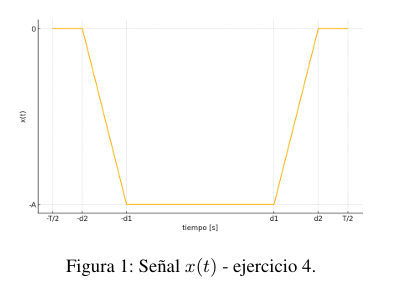

In [19]:
import numpy as np  # Importa la biblioteca NumPy, que se usa para cálculos numéricos eficientes
import matplotlib.pyplot as plt  # Importa la biblioteca de gráficos

from ipywidgets import interact  # Importa 'interact', que permite crear controles interactivos en notebooks, útil para probar distintos valores de N

import warnings  # Importa el módulo de advertencias para controlar o suprimir mensajes del sistema

warnings.filterwarnings("ignore")  # Indica que se ignoren todas las advertencias al ejecutar el código, para evitar que interfieran visualmente en la salida

# Parámetros de la señal
T = 10           # Período de la señal
A = 2            # Amplitud máxima de la señal
d1 = 1           # Mitad de la parte plana central de la señal
d2 = 3           # Punto hasta donde llegan las rampas (desde el centro)
w0 = 2 * np.pi / T  # Frecuencia angular fundamental

# Vector de tiempo para un periodo completo con alta resolución

num_points = 2000  # Número total de puntos del vector de tiempo. Cuanto mayor es este número, más suave y precisa será la señal continua y sus derivadas

t = np.linspace(-T/2, T/2, num_points)  # Crea un vector de tiempo desde -T/2 hasta T/2 (es decir, un período completo), dividido en 'num_points' partes iguales

dt = t[1] - t[0]  # Calcula el paso temporal (delta t), es decir, la diferencia entre dos muestras consecutivas del vector de tiempo


# Definición de la señal x(t) en tramos
x = np.zeros_like(t)  # Crea un arreglo del mismo tamaño que t, inicializado en ceros

for i in range(num_points):  # Recorre todos los índices del vector de tiempo
    if -T/2 <= t[i] < -d2:      # Primer tramo: antes del inicio de la rampa descendente
        x[i] = 0                # x(t) = 0 en este intervalo
    elif -d2 <= t[i] <= -d1:    # Segundo tramo: rampa descendente desde 0 hasta -A
        x[i] = (-A / (d2 - d1)) * (t[i] + d2)  # Ecuación de la recta descendente con pendiente negativa
    elif -d1 < t[i] < d1:       # Tercer tramo: parte plana donde x(t) permanece constante en -A
        x[i] = -A
    elif d1 <= t[i] <= d2:      # Cuarto tramo: rampa ascendente desde -A hasta 0
        x[i] = (A / (d2 - d1)) * (t[i] - d2)  # Ecuación de la recta ascendente con pendiente positiva
    elif d2 < t[i] <= T/2:      # Último tramo: después de la rampa ascendente
        x[i] = 0                # x(t) = 0 nuevamente


# Segunda derivada numérica de la señal x(t)
x2p = np.gradient(np.gradient(x, dt), dt)  # x''(t) usando derivadas centradas

def pltest(Na):  # Na = número de armónicos a considerar (hasta ±Na)
    an = np.zeros(Na + 1)  # Coeficientes a_n (coseno)
    bn = np.zeros(Na + 1)  # Coeficientes b_n (seno)

    for n in range(1, Na + 1):  # Recorre los armónicos desde 1 hasta Na
      an[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.cos(n * w0 * t), t)
    # Calcula a_n usando x''(t) con la fórmula:
    # a_n = -2/(T * (n*w0)^2) * ∫ x''(t) * cos(n*w0*t) dt (integración numérica con trapecios)

      bn[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.sin(n * w0 * t), t)
    # Calcula b_n de forma similar, pero con sin(n*w0*t)


    a0 = (2 / T) * np.trapz(x, t) # a0 se obtiene con la fórmula clásica: (2/T) ∫ x(t) dt # Aquí no se usa x''(t), ya que a0 depende solo del promedio de x(t)

    x_recon = np.full_like(t, a0 / 2)  # Inicializa x_recon con el término constante a0/2
    for n in range(1, Na + 1):  # Suma cada armónico al resultado
        x_recon += an[n] * np.cos(n * w0 * t) + bn[n] * np.sin(n * w0 * t)
    # Suma el término cosenoidal (an) y senoidal (bn) correspondiente a cada n

    error_rel = np.linalg.norm(x - x_recon) / np.linalg.norm(x) # Calcula el error relativo ||x - x_recon|| / ||x|| (norma L2)

    print(f"Error relativo de reconstrucción (n=±{Na}): {error_rel:.6f}")# Muestra el error en pantalla con 6 cifras decimales


    # Espectros
    n_vals = np.arange(0, Na + 1)  # Crea un array con los valores de n desde 0 hasta Na (inclusive)
    magnitudes = np.zeros(Na + 1)
    fases = np.zeros(Na + 1) # Inicializa los arrays para guardar la magnitud y fase de cada armónico

    magnitudes[0] = np.abs(a0 / 2) # La magnitud del coeficiente DC (n=0) es |a0/2|
    fases[0] = 0 # Por convención, la fase del término constante (n=0) es 0
    for n in range(1, Na + 1):
        magnitudes[n] = np.sqrt(an[n]**2 + bn[n]**2) # Calcula la magnitud del coeficiente complejo Cn = an - jbn

        fases[n] = np.arctan2(-bn[n], an[n])
    # Calcula la fase de Cn usando atan2 para el ángulo correcto

    parte_real = an # La parte real de Cn es simplemente a_n
    parte_imaginaria = -bn # La parte imaginaria de Cn es -b_n (por definición de Cn = a_n - j*b_n)

    # --- Gráfica señal reconstruida ---
    plt.figure(figsize=(10, 4))  # Crea una figura con tamaño personalizado
    plt.plot(t, x, label='x(t)', color='orange')  # Señal original
    plt.plot(t, x_recon, '--', label='Reconstrucción', color='blue')  # Señal reconstruida
    plt.title(f"Reconstrucción de x(t) con N = {Na}")  # Título con el número de armónicos usados
    plt.xlabel("Tiempo [s]") #etiqueta del eje x
    plt.ylabel("Amplitud") #etiqueta del eje y
    plt.legend() # Muestra la leyenda de las curvas
    plt.grid(True) # Activa la cuadrícula para mejor visualización
    plt.tight_layout() # Ajusta automáticamente márgenes para que no se sobrepongan los elementos
    plt.show() # Muestra la figura

    # --- Gráficas de espectro ---
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Crea una figura con una cuadrícula de 2x2 subgráficas y tamaño 10x8 pulgadas. # axs es un arreglo 2x2 de ejes (axs[0, 0], axs[0, 1], etc.)

    axs[0, 0].stem(n_vals, magnitudes, basefmt=" ") # Dibuja un gráfico de líneas verticales (tipo 'stem') de las magnitudes de los coeficientes Cn
    axs[0, 0].set_title("Magnitud |Cₙ|") # Título del subplot: magnitudes del espectro
    axs[0, 0].set_xlabel("n") # Etiqueta del eje x: índice del armónico
    axs[0, 0].set_ylabel("Magnitud") # Etiqueta del eje y: valor de la magnitud

    axs[0, 1].stem(n_vals, fases, basefmt=" ") # Grafica las fases ∠Cn de cada coeficiente complejo
    axs[0, 1].set_title("Fase ∠Cₙ") # Título del subplot
    axs[0, 1].set_xlabel("n")
    axs[0, 1].set_ylabel("Fase [rad]") # Fase medida en radianes

    axs[1, 0].stem(n_vals, parte_real, basefmt=" ") # Dibuja las partes reales de Cn (a_n)
    axs[1, 0].set_title("Parte Real")
    axs[1, 0].set_xlabel("n")
    axs[1, 0].set_ylabel("Re{Cₙ}") # Re{Cn} es la notación para la parte real

    axs[1, 1].stem(n_vals, parte_imaginaria, basefmt=" ") # Grafica las partes imaginarias de Cn (−b_n)
    axs[1, 1].set_title("Parte Imaginaria")
    axs[1, 1].set_xlabel("n")
    axs[1, 1].set_ylabel("Im{Cₙ}") # Im{Cn} es la notación para la parte imaginaria

    for ax in axs.flat:
        ax.grid(True) # Recorre todos los subplots (flattened array) y les activa una cuadrícula para mejor lectura

    plt.tight_layout() # Ajusta automáticamente los márgenes para evitar que los textos o gráficos se sobrepongan
    plt.show() # Muestra toda la figura con las 4 subgráficas

# Interfaz interactiva
interact(pltest, Na=(0, 5, 1))
# Crea un deslizador interactivo que permite modificar el valor de Na (número de armónicos)
# Na irá desde 0 hasta 5, en pasos de 1. Al mover el deslizador se ejecuta pltest(Na)


interactive(children=(IntSlider(value=2, description='Na', max=5), Output()), _dom_classes=('widget-interact',…

<function __main__.pltest(Na)>